In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [2]:
seed_max = 501
df = pd.DataFrame()
for i in range(seed_max):
    try:
        df = pd.concat([df, pd.read_csv("results_5_10/results_energy_"+str(i)+".csv")])
    except:
        pass
#df = df.loc[df['End_id'] == 10]    

In [3]:
df

,Dataset,Train_Length,Test_Length,End_id,Rho_beta,Rho,Rho_V,Past,Num_past,Val,Train_test_split,Method,MAE,MAPE,RMSE,R2,CVAR_05,CVAR_15,Time
0,energy,4933,1973,11,0.0,0.0,0.0,2.0,5000.0,1973.0,0.5,mean,33.592670,33.280488,76.519892,0.162641,294.266815,151.279274,0
1,energy,4933,1972,11,0.0,0.0,0.0,2.0,5000.0,1973.0,0.5,last_timestep,24.345842,22.357172,60.762982,0.471709,238.620690,115.192698,0
2,energy,4933,1973,11,0.0,0.0,0.0,2.0,5000.0,1973.0,0.5,best_model,31.253246,28.030497,77.260873,0.146345,300.471321,152.234341,0
3,energy,4933,1973,11,0.0,0.0,0.0,2.0,5000.0,1973.0,0.5,bandits_full,34.524973,35.768889,75.258064,0.190030,287.050675,147.579133,0
4,energy,4933,1973,11,0.0,0.0,0.0,2.0,5000.0,1973.0,0.5,bandits_recent,33.130298,32.661980,75.895921,0.176242,291.935094,150.260923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,energy,6906,2956,11,1.0,1.0,1.0,5.0,5000.0,2956.0,0.7,ridge,36.304003,35.631726,76.823316,0.280062,288.098920,143.857437,12570
18,energy,6906,2956,11,1.0,1.0,1.0,5.0,5000.0,2956.0,0.7,adaptive_ridge_exact,32.655177,32.265102,69.929278,0.403477,263.639035,126.633542,774493
19,energy,6906,2956,11,1.0,1.0,1.0,5.0,5000.0,2956.0,0.7,adaptive_ridge_standard,29.637077,26.341150,67.155320,0.449864,251.500133,127.324624,890630
20,energy,6906,2956,11,1.0,1.0,1.0,5.0,5000.0,2956.0,0.7,adaptive_ridge_exact_err_rule,31.229821,30.642364,67.450494,0.445017,255.250886,122.349765,878659


In [4]:
df.columns

Index(['Dataset', 'Train_Length', 'Test_Length', 'End_id', 'Rho_beta', 'Rho',
       'Rho_V', 'Past', 'Num_past', 'Val', 'Train_test_split', 'Method', 'MAE',
       'MAPE', 'RMSE', 'R2', 'CVAR_05', 'CVAR_15', 'Time'],
      dtype='object')

In [5]:
def get_results(df):
    res = df.groupby(['Method', 'Rho', 'Rho_beta', 'Rho_V', 'Test_Length', 'Past']).mean()
    
    return res[['MAE', 'MAPE', 'RMSE', 'CVAR_05', 'CVAR_15']]

In [7]:
#fuse val with test
def fuse_val_test(df, past):
    #df = df.loc[df['Past'] == past]
    df_val = df.loc[df['Train_test_split'] == 0.5].reset_index(drop=True)
    df_test = df.loc[df['Train_test_split'] == 0.7].reset_index(drop=True)
    new_df = pd.merge(df_val, df_test, how = 'left', on=['Rho_beta','Rho', 'Rho_V', 'Method'])
    return df_val, df_test, new_df
#get min value for each metric

v, t, n = fuse_val_test(df, 5)
n = n[['Method', 'MAE_x', 'CVAR_05_x', 'MAE_y', 'RMSE_y', 'MAPE_y', 'CVAR_05_y', 'CVAR_15_y', 'Test_Length_y', 'Rho_beta','Rho', 'Rho_V']]
#print(v[v.MAE == v.MAE.min()])
n.loc[n.groupby('Method')['MAE_x'].idxmin()].groupby('Method').min()


,MAE_x,CVAR_05_x,MAE_y,RMSE_y,MAPE_y,CVAR_05_y,CVAR_15_y,Test_Length_y,Rho_beta,Rho,Rho_V
Method,,,,,,,,,,,
PA,46.660623,405.576319,52.224570,149.075797,45.046274,476.730843,249.805115,2956.0,0.100,0.0,0.000
adaptive_ridge_exact,25.450158,197.105938,26.800416,59.451997,24.882035,224.663946,112.205704,2956.0,0.001,0.0,0.001
adaptive_ridge_exact_err_rule,25.369857,197.570260,26.318738,59.385307,23.527681,224.940957,113.833712,2956.0,0.000,1.0,0.001
adaptive_ridge_standard,25.454774,197.587074,26.280588,59.429660,23.512097,224.756919,113.975988,2956.0,0.000,1.0,0.010
adaptive_ridge_standard_err_rule,25.369857,197.570260,26.318738,59.385307,23.527681,224.940957,113.833712,2956.0,0.000,1.0,0.001
bandits_full,34.524973,287.050675,33.490266,77.579918,28.507370,294.034069,153.019637,2956.0,0.000,0.0,0.000
bandits_recent,33.042015,293.567181,32.859060,78.762490,27.126708,301.884967,156.446592,2956.0,0.000,0.0,0.000
best_model,31.253246,300.471321,31.097053,79.982006,23.247575,309.016443,158.330595,2956.0,0.000,0.0,0.000
last_timestep,24.345842,238.620690,26.734349,66.847302,21.537393,262.098139,129.830795,2955.0,0.000,0.0,0.000


In [6]:
past = 5
m = df.loc[df['Past'] == past].groupby(['Method', 'Test_Length', 'Past']).min()['CVAR_05']['ridge'][0]
(df.loc[df['Past'] == past].groupby(['Method', 'Test_Length', 'Past']).min()['CVAR_05'] - m)/m

Method                            Test_Length  Past
PA                                1973         5.0     0.312728
                                  2956         5.0     0.572853
adaptive_ridge_exact              1973         5.0    -0.262899
                                  2956         5.0    -0.159724
adaptive_ridge_exact_err_rule     1973         5.0    -0.262499
                                  2956         5.0    -0.159664
adaptive_ridge_standard           1973         5.0    -0.262899
                                  2956         5.0    -0.159697
adaptive_ridge_standard_err_rule  1973         5.0    -0.262146
                                  2956         5.0    -0.157522
bandits_full                      1973         5.0     0.086468
                                  2956         5.0     0.112899
bandits_recent                    1973         5.0     0.111132
                                  2956         5.0     0.149088
best_model                        1973         5.0  

In [8]:
df_p = df.loc[df['Past'] == past]
df_p.groupby(['Method', 'Test_Length']).agg({'MAE': ['min']})

MAE
                                                   min
Method                           Test_Length          
PA                               1699         0.163054
                                 2548         0.194521
adaptive_ridge_exact             1699         0.118319
                                 2548         0.132871
adaptive_ridge_exact_err_rule    1699         0.113994
                                 2548         0.132745
adaptive_ridge_standard          1699         0.118319
                                 2548         0.132871
adaptive_ridge_standard_err_rule 1699         0.113994
                                 2548         0.132745
bandits_full                     1699         0.108061
                                 2548         0.128248
bandits_recent                   1699         0.121748
                                 2548         0.147091
best_model                       1699         0.108058
                                 2548         0.128245
last_timestep                    1698         0.143516
                                 2547         0.164114
mean                             1699         0.130932
                                 2548         0.156079
ridge                            1699         0.113054
                                 2548         0.130570

In [105]:
print(df[df.MAE == df.MAE.min()])

         Dataset  Train_Length  Test_Length  End_id  Rho_beta  Rho  Rho_V  \
30  hurricane_NA           611          261      10     0.001  0.0    0.1   

    Past  Num_past    Val  Train_test_split                Method       MAE  \
30   2.0     700.0  600.0               0.7  adaptive_ridge_exact  7.247553   

         MAPE       RMSE        R2    CVAR_05    CVAR_15  Time  
30  11.527669  10.209904  0.884028  29.622255  21.110238     0  


In [34]:
n.loc[n.groupby('Method')['MAE_x'].idxmin()].groupby('Method').min()

,MAE_x,CVAR_05_x,MAE_y,RMSE_y,MAPE_y,CVAR_05_y,CVAR_15_y,Test_Length_y,Rho_beta,Rho,Rho_V
Method,,,,,,,,,,,
PA,0.163054,0.962442,0.194521,0.343199,83.849637,1.148479,0.732947,2548.0,0.01,0.0,0.0
adaptive_ridge_exact,0.117029,0.760724,0.131974,0.241969,59.260713,0.843283,0.513512,2548.0,0.00,0.0,1.0
adaptive_ridge_exact_err_rule,0.111814,0.745743,0.132050,0.241616,59.674975,0.842136,0.511355,2548.0,0.00,0.0,1.0
adaptive_ridge_standard,0.117029,0.760724,0.131974,0.241969,59.260713,0.843283,0.513512,2548.0,0.00,0.0,1.0
adaptive_ridge_standard_err_rule,0.111814,0.745743,0.132050,0.241616,59.674975,0.842136,0.511355,2548.0,0.00,0.0,1.0
bandits_full,0.108061,0.735944,0.128248,0.241912,60.082422,0.847374,0.514797,2548.0,0.00,0.0,0.0
bandits_recent,0.121748,0.840376,0.145630,0.268906,61.426165,0.960620,0.567652,2548.0,0.00,0.0,0.0
best_model,0.108058,0.735990,0.128245,0.241908,60.083734,0.847358,0.514794,2548.0,0.00,0.0,0.0
last_timestep,0.143516,1.078598,0.164114,0.336133,84.659405,1.215194,0.734004,2547.0,0.00,0.0,0.0


In [90]:
print(n[n.MAE == n.MAE.min()])

,Dataset_x,Train_Length_x,Test_Length_x,End_id_x,Rho_beta,Rho,Rho_V,Past_x,Num_past_x,Val_x,...,Num_past_y,Val_y,Train_test_split_y,MAE_y,MAPE_y,RMSE_y,R2_y,CVAR_05_y,CVAR_15_y,Time_y
0,hurricane_NA,406,162,10,0.0,0.0,0.0,3.0,500.0,162.0,...,700.0,600.0,0.7,9.479484,13.955259,12.853807,0.820405,35.678101,25.740430,0.0
1,hurricane_NA,406,162,10,0.0,0.0,0.0,3.0,500.0,162.0,...,700.0,600.0,0.7,9.368313,14.192082,12.371272,0.833636,31.691363,24.997258,0.0
2,hurricane_NA,406,162,10,0.0,0.0,0.0,3.0,500.0,162.0,...,700.0,600.0,0.7,8.890697,13.331931,11.630426,0.852964,30.542667,22.769676,0.0
3,hurricane_NA,406,161,10,0.0,0.0,0.0,3.0,500.0,162.0,...,700.0,600.0,0.7,13.419422,21.518787,18.449031,0.631449,48.016529,36.501378,0.0
4,hurricane_NA,406,162,10,0.0,0.0,0.0,3.0,500.0,162.0,...,700.0,600.0,0.7,12.914974,20.550484,18.096711,0.644015,52.008132,37.076037,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,hurricane_NA,406,161,10,1.0,1.0,1.0,3.0,500.0,162.0,...,700.0,600.0,0.7,13.419422,21.518787,18.449031,0.631449,48.016529,36.501378,0.0
988,hurricane_NA,406,162,10,1.0,1.0,1.0,3.0,500.0,162.0,...,700.0,600.0,0.7,9.357367,14.324358,12.602373,0.827362,34.568236,25.516271,0.0
989,hurricane_NA,406,162,10,1.0,1.0,1.0,3.0,500.0,162.0,...,700.0,600.0,0.7,9.400132,14.849285,12.461245,0.831207,34.261113,24.634286,0.0
990,hurricane_NA,406,162,10,1.0,1.0,1.0,3.0,500.0,162.0,...,700.0,600.0,0.7,8.934574,14.317791,11.524424,0.855632,30.704058,22.335537,0.0


In [ ]:
def get_best_params(df, method, past, metric):
    

In [29]:
df.groupby(['Method', 'Test_Length', 'Past']).min()[:50]

Dataset  Train_Length  End_id  \
Method                  Test_Length Past                                       
PA                      162         2.0   hurricane_NA           437      10   
                                    3.0   hurricane_NA           406      10   
                                    4.0   hurricane_NA           377      10   
                                    5.0   hurricane_NA           350      10   
                        209         5.0   hurricane_NA           490      10   
                        225         4.0   hurricane_NA           527      10   
                        243         3.0   hurricane_NA           568      10   
                        261         2.0   hurricane_NA           611      10   
adaptive_ridge_exact    162         2.0   hurricane_NA           437      10   
                                    3.0   hurricane_NA           406      10   
                                    4.0   hurricane_NA           377      10   
                                    5.0   hurricane_NA           350      10   
                        209         5.0   hurricane_NA           490      10   
                        225         4.0   hurricane_NA           527      10   
                        243         3.0   hurricane_NA           568      10   
                        261         2.0   hurricane_NA           611      10   
adaptive_ridge_standard 162         2.0   hurricane_NA           437      10   
                                    3.0   hurricane_NA           406      10   
                                    4.0   hurricane_NA           377      10   
                                    5.0   hurricane_NA           350      10   
                        209         5.0   hurricane_NA           490      10   
                        225         4.0   hurricane_NA           527      10   
                        243         3.0   hurricane_NA           568      10   
                        261         2.0   hurricane_NA           611      10   
bandits_full            162         2.0   hurricane_NA           437      10   
                                    3.0   hurricane_NA           406      10   
                                    4.0   hurricane_NA           377      10   
                                    5.0   hurricane_NA           350      10   
                        209         5.0   hurricane_NA           490      10   
                        225         4.0   hurricane_NA           527      10   
                        243         3.0   hurricane_NA           568      10   
                        261         2.0   hurricane_NA           611      10   
best_model              162         2.0   hurricane_NA           437      10   
                                    3.0   hurricane_NA           406      10   
                                    4.0   hurricane_NA           377      10   
                                    5.0   hurricane_NA           350      10   
                        209         5.0   hurricane_NA           490      10   
                        225         4.0   hurricane_NA           527      10   
                        243         3.0   hurricane_NA           568      10   
                        261         2.0   hurricane_NA           611      10   
last_timestep           161         2.0   hurricane_NA           437      10   
                                    3.0   hurricane_NA           406      10   
                                    4.0   hurricane_NA           377      10   
                                    5.0   hurricane_NA           350      10   
                        208         5.0   hurricane_NA           490      10   
                        224         4.0   hurricane_NA           527      10   
                        242         3.0   hurricane_NA           568      10   
                        260         2.0   hurricane_NA           611      10   
mean                    162         2.0   hurri

In [36]:
df_p = df.loc[df['Past'] == past]
df_p.loc[df_p['Method'] == 'adaptive_ridge_standard'].sort_values('MAE')[:50]

,Dataset,Train_Length,Test_Length,End_id,Rho_beta,Rho,Rho_V,Past,Num_past,Val,Train_test_split,Method,MAE,MAPE,RMSE,R2,CVAR_05,CVAR_15,Time
31,hurricane_NA,611,261,10,0.010,0.000,0.10,2.0,700.0,600.0,0.7,adaptive_ridge_standard,7.248885,11.521252,10.228204,0.883612,29.735479,21.194813,0
31,hurricane_NA,611,261,10,1.000,0.000,0.10,2.0,700.0,600.0,0.7,adaptive_ridge_standard,7.248885,11.521252,10.228204,0.883612,29.735479,21.194813,0
31,hurricane_NA,611,261,10,0.000,0.000,0.10,2.0,700.0,600.0,0.7,adaptive_ridge_standard,7.248885,11.521252,10.228204,0.883612,29.735479,21.194813,0
31,hurricane_NA,611,261,10,0.001,0.000,0.10,2.0,700.0,600.0,0.7,adaptive_ridge_standard,7.248885,11.521252,10.228204,0.883612,29.735479,21.194813,0
31,hurricane_NA,611,261,10,0.100,0.000,0.10,2.0,700.0,600.0,0.7,adaptive_ridge_standard,7.248885,11.521252,10.228204,0.883612,29.735479,21.194813,0
31,hurricane_NA,611,261,10,0.001,0.001,0.10,2.0,700.0,600.0,0.7,adaptive_ridge_standard,7.253358,11.534857,10.218670,0.883829,29.655287,21.128517,0
31,hurricane_NA,611,261,10,0.100,0.001,0.10,2.0,700.0,600.0,0.7,adaptive_ridge_standard,7.253358,11.534857,10.218670,0.883829,29.655287,21.128517,0
31,hurricane_NA,611,261,10,0.010,0.001,0.10,2.0,700.0,600.0,0.7,adaptive_ridge_standard,7.253358,11.534857,10.218670,0.883829,29.655287,21.128517,0
31,hurricane_NA,611,261,10,0.000,0.001,0.10,2.0,700.0,600.0,0.7,adaptive_ridge_standard,7.253358,11.534857,10.218670,0.883829,29.655287,21.128517,0
31,hurricane_NA,611,261,10,1.000,0.001,0.10,2.0,700.0,600.0,0.7,adaptive_ridge_standard,7.253358,11.534857,10.218670,0.883829,29.655287,21.128517,0


In [12]:
# df_2 = df.loc[df['Period'] == 4]
# df3 = df_2.loc[df_2['Test_Length'] < 1100]
# df4 = df3.loc[df3['Train_Length'] < 2100]
# df5 = df4.loc[df4['Bias_Drift_range'] == df4['Std_Drift_Range']]
# df6 = df5.loc[df5['Past'] == 5]
# res = get_results(df6)
# res[20:80]

Method                            Rho    Rho_beta  Bias_Drift_range  Std_Drift_Range  N_models  Train_Length  Past
adaptive_ridge_exact              0.001  0.001     0.5               0.5              10        201           5.0     0.147809
                                                                                                401           5.0     0.098547
                                                                                                751           5.0     0.072850
                                                                                                1501          5.0     0.056225
                                  0.010  0.010     0.5               0.5              10        51            5.0     0.540861
                                                                                                101           5.0     0.219123
                                                                                                201           5.0     0.135

In [5]:
def get_results(df, period = 4, test_length = 1100, train_length_max = 3100, train_length_min = 2900, past_min = 5, past_max = 5, rho = 0.01, rho_beta = 0.01, N_models_min = 9, N_models_max = 11, bias_drift_min = 0.49, bias_drift_max = 0.51):
    df_2 = df.loc[df['Period'] == period]
    df3 = df_2.loc[df_2['Test_Length'] < test_length]
    df4 = df3.loc[df3['Train_Length'] < train_length_max]
    df5 = df4.loc[df4['Bias_Drift_range'] < bias_drift_max]
    df6 = df5.loc[df5['Past'] >= past_min]
    df7 = df6.loc[df6['Rho'] == rho]
    df8 = df7.loc[df7['Rho_beta'] == rho_beta]
    df9 = df8.loc[df8['Train_Length'] > train_length_min]
    df10 = df9.loc[df9['N_models'] > N_models_min]
    df11 = df10.loc[df10['N_models'] < N_models_max] 
    df12 = df11.loc[df11['Bias_Drift_range'] > bias_drift_min]
    df13 = df12.loc[df12['Past'] <= past_max]
    return df12[['Method','Bias_Drift_range','N_models','Train_Length', 'Past', 'MAE', 'MAPE', 'RMSE', 'CVAR_05', 'CVAR_15', 'Time']]

In [6]:
get_results(df, rho = 0.1, rho_beta = 0.1).groupby(['Method']).mean()

,Bias_Drift_range,N_models,Train_Length,Past,MAE,MAPE,RMSE,CVAR_05,CVAR_15,Time
Method,,,,,,,,,,
PA,0.5,10.0,3001.0,13.666667,0.082414,42.599111,0.104178,0.250015,0.197945,0.000000
adaptive_ridge_exact,0.5,10.0,3001.0,13.666667,0.076698,42.254294,0.096311,0.225458,0.181997,864335.750000
adaptive_ridge_exact_err_rule,0.5,10.0,3001.0,13.666667,0.076817,42.036780,0.096385,0.225210,0.181991,863928.577778
adaptive_ridge_standard,0.5,10.0,3001.0,13.666667,0.066678,38.135808,0.083604,0.195098,0.157765,921304.905556
adaptive_ridge_standard_err_rule,0.5,10.0,3001.0,13.666667,0.068891,38.585367,0.086495,0.202398,0.163428,944038.888889
bandits_full,0.5,10.0,3001.0,13.666667,0.255443,145.737879,0.306727,0.658784,0.547051,0.000000
bandits_recent,0.5,10.0,3001.0,13.666667,0.187801,105.348600,0.234878,0.552046,0.441196,0.000000
best_model,0.5,10.0,3001.0,13.666667,0.241187,126.278123,0.298691,0.677074,0.554586,0.000000
last_timestep,0.5,10.0,3001.0,13.666667,0.110999,57.860884,0.140048,0.336577,0.266247,0.000000


In [7]:
labels = ['PA', 'adaptive_ridge_exact', 'adaptive_ridge_exact_err_rule', 'adaptive_ridge_standard', 'adaptive_ridge_standard_err_rule',
         'bandits_full', 'bandits_recent', 'best_model', 'last_timestep', 'mean', 'ridge']

labels_choice = ['adaptive_ridge_exact_err_rule', 'PA', 'ridge', 'bandits_recent', 'best_model', 'mean']

In [8]:
metric = 'MAPE'
rhos = [0.01, 0.001, 0.1]
results = get_results(df, rho = 0.1, rho_beta = 0.1, bias_drift_min = 0, bias_drift_max = 1.4)
scores = results.groupby(['Method', 'Bias_Drift_range']).mean()[metric]
std_scores = results.groupby(['Method', 'Bias_Drift_range']).std()[metric]

#reshaping
scores_ = np.array(scores.values.reshape(11, -1))
std_scores_ = np.array(std_scores.values.reshape(11, -1))

scores_ = pd.DataFrame(scores_.transpose(), columns = labels)
std_scores_ = pd.DataFrame(std_scores_.transpose(), columns = labels)

In [9]:
metric = 'MAPE'
rhos = [0.01, 0.001, 0.1]
results = get_results(df.sort_values(by=['Train_Length']), rho = 0.01, rho_beta = 0.01, train_length_max=3005, train_length_min=0)
scores = results.groupby(['Method', 'Train_Length']).mean()[metric]
std_scores = results.groupby(['Method', 'Train_Length']).std()[metric]

#reshaping
scores_ = np.array(scores.values.reshape(11, -1))
std_scores_ = np.array(std_scores.values.reshape(11, -1))

scores_ = pd.DataFrame(scores_.transpose(), columns = labels)
std_scores_ = pd.DataFrame(std_scores_.transpose(), columns = labels)

In [10]:
metric = 'MAPE'
rhos = [0.01, 0.001, 0.1]
results = get_results(df.sort_values(by=['Past']), rho = 0.01, rho_beta = 0.01, past_min = 0, past_max = 60)
scores = results.groupby(['Method', 'Past']).mean()[metric]
std_scores = results.groupby(['Method', 'Past']).std()[metric]

#reshaping
scores_ = np.array(scores.values.reshape(11, -1))
std_scores_ = np.array(std_scores.values.reshape(11, -1))

scores_ = pd.DataFrame(scores_.transpose(), columns = labels)
std_scores_ = pd.DataFrame(std_scores_.transpose(), columns = labels)

In [196]:
results['Train_Length'].unique()

array([3001])

In [11]:
def get_scores(df, metric = 'MAPE', mode = 'Bias_Drift_range', rhos = [0.01, 0.1], period = 4, test_length = 1100, train_length_max = 3100, train_length_min = 2900, past_min = 5, past_max = 5, N_models_min = 9, N_models_max = 11, bias_drift_min = 0.49, bias_drift_max = 0.51):
    
    best_scores = pd.DataFrame()
    for r in rhos:
        results = get_results(df, rho = r, rho_beta = r, period = period, test_length = test_length, train_length_max = train_length_max, train_length_min = train_length_min, past_min = past_min, past_max = past_max, N_models_min = N_models_min, N_models_max = N_models_max, bias_drift_min = bias_drift_min, bias_drift_max = bias_drift_max)
        scores = results.groupby(['Method', mode]).mean()[metric]
        std_scores = results.groupby(['Method', mode]).std()[metric]

        #reshaping
        scores_ = np.array(scores.values.reshape(11, -1))
        std_scores_ = np.array(std_scores.values.reshape(11, -1))

        scores_ = pd.DataFrame(scores_.transpose(), columns = labels)
        std_scores_ = pd.DataFrame(std_scores_.transpose(), columns = labels)
        
        best_scores = pd.concat([best_scores, scores_]).min(level=0)
        try:
            best_std_scores = best_std_scores.where(scores_ <= best_scores, std_scores_)
        except:
            best_std_scores = std_scores_
        #std_scores_.where(s < scores_, st)
    return best_scores, best_std_scores, results[mode].unique()

In [12]:
def get_scores_experiment(df, metric, mode, rhos = [0.01, 0.1]):
    df = df.sort_values(by=[mode])
    #val = df[mode].unique()
    if mode == 'N_models':
        return get_scores(df, metric = metric, mode = mode, rhos = rhos, N_models_min = 1, N_models_max = 60)
    elif mode == 'Bias_Drift_range':
        return get_scores(df, metric = metric, mode = mode, rhos = rhos, bias_drift_min = 0, bias_drift_max = 1.4)
    elif mode == 'Train_Length':
        return get_scores(df, metric = metric, mode = mode, rhos = rhos, train_length_max=3005, train_length_min=0)
    elif mode == 'Past':
        return get_scores(df, metric = metric, mode = mode, rhos = rhos, past_min = 0, past_max = 60)

In [13]:
#get_scores_experiment(df, 'MAE', 'Train_Length')

In [14]:
def get_plots(df, mode, rhos = [0.01, 0.1], metrics = ['MAE', 'RMSE', 'MAPE', 'CVAR_05', 'CVAR_15', 'Time']):
    labels_choice = ['adaptive_ridge_exact_err_rule', 'PA', 'ridge', 'bandits_recent', 'best_model', 'mean']
    fig, ax = plt.subplots(2, 3, figsize=(12, 12))
    clrs = sns.color_palette("husl", len(labels_choice))
    for k in range(len(metrics)):
        metric = metrics[k]
        a = k//3 
        b = k%3
        scores_, std_scores_, vals = get_scores_experiment(df, metric, mode, rhos)
        with sns.axes_style("darkgrid"):
            #[0.05, 0.1, 0.25, 0.5, 1]
            col = 0
            for i in labels_choice:
                meanst = np.array(scores_[i])
                sdt = np.array(std_scores_[i])
                ax[a,b].plot(vals, meanst, label=i, c=clrs[col])
                ax[a,b].fill_between(vals, meanst-sdt, meanst+sdt ,alpha=0.2, facecolor=clrs[col])
                col+=1
            ax[0,0].legend()
            ax[a,b].set_title(metric)
            #ax[a,b].set_yscale('log')

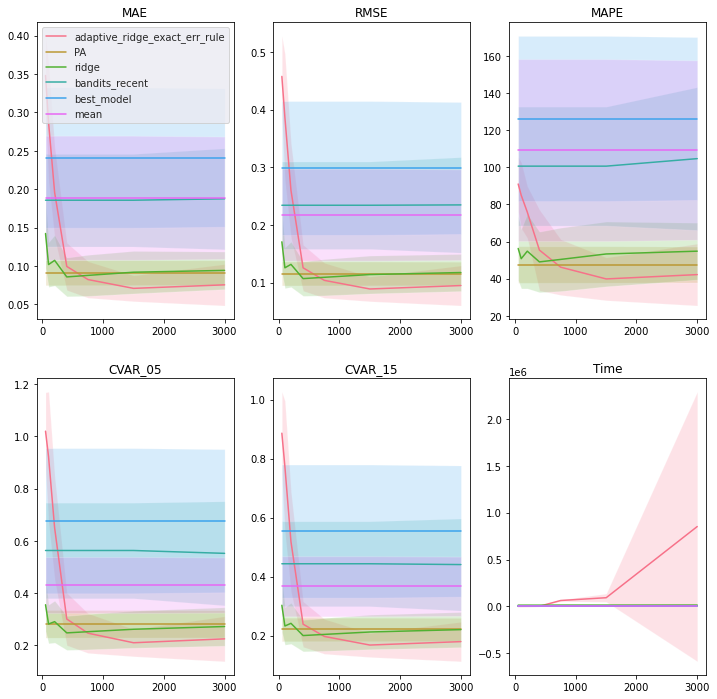

In [15]:
get_plots(df, 'Train_Length', [0.01, 0.001])

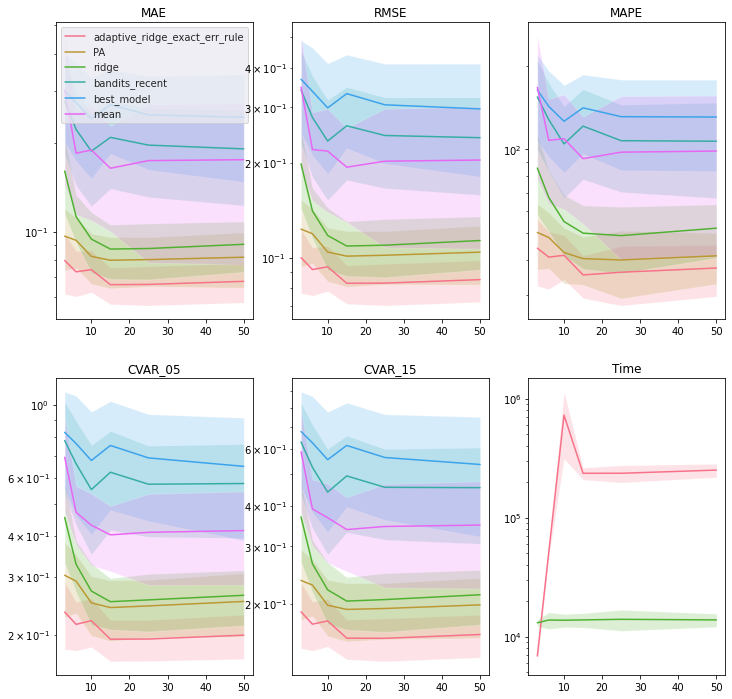

In [206]:
get_plots(df, 'N_models', [0.01, 0.1])

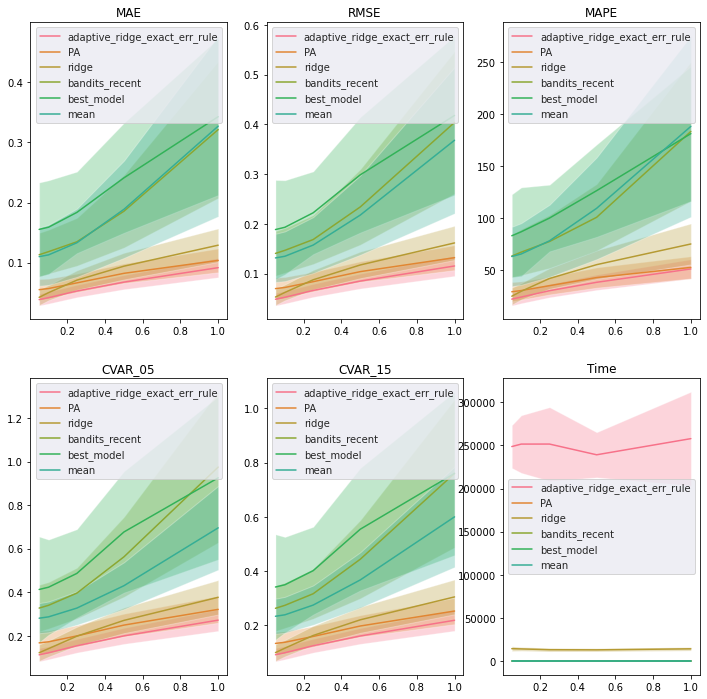

In [118]:
get_plots(df, 'Bias_Drift_range', [0.01, 0.1])

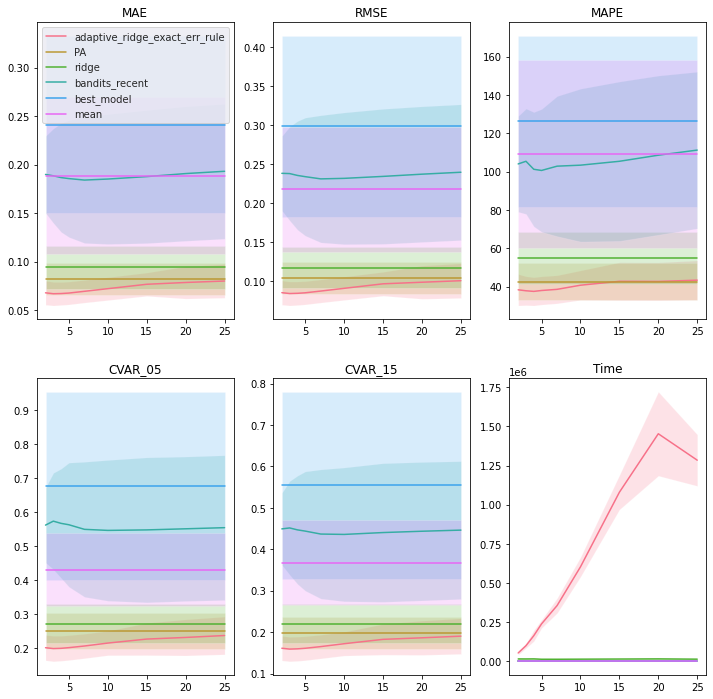

In [16]:
get_plots(df, 'Past', [0.01, 0.1])

ValueError: operands could not be broadcast together with shapes (9,) (8,) 

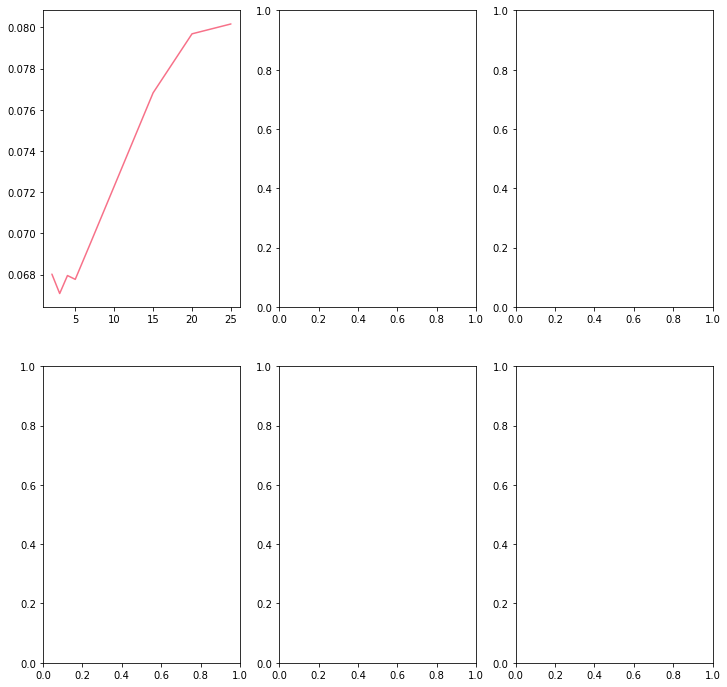

In [211]:
get_plots(df, 'Past', [0.01, 0.1])

In [77]:
(scores_, std_scores_), vals_ = get_scores_experiment(df, 'MAE', 'N_models')

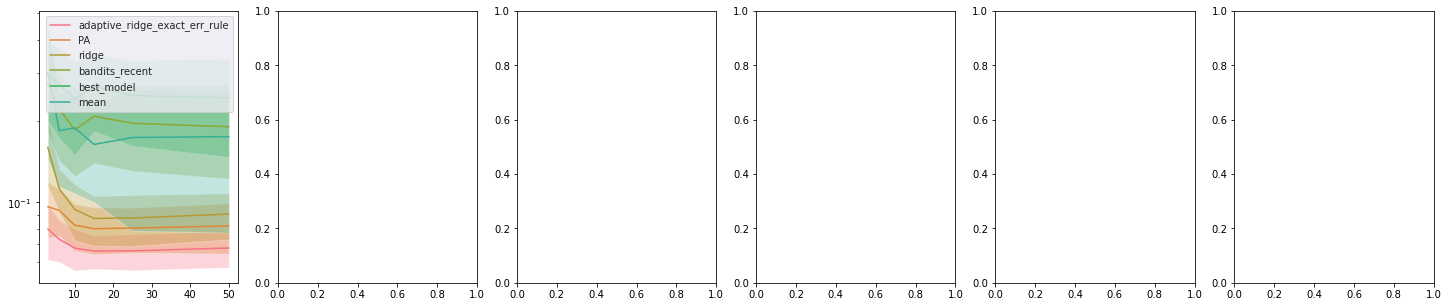

In [98]:
fig, ax = plt.subplots(1, 6, figsize=(25, 5))
clrs = sns.color_palette("husl", len(labels))
with sns.axes_style("darkgrid"):
    vals = vals_#[0.05, 0.1, 0.25, 0.5, 1]
    col = 0
    for i in labels_choice:
        meanst = np.array(scores_[i])
        sdt = np.array(std_scores_[i])
        ax[0].plot(vals, meanst, label=i, c=clrs[col])
        ax[0].fill_between(vals, meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[col])
        col+=1
    ax[0].legend()
    ax[0].set_yscale('log')

In [ ]:
#TODO: get best model performance

In [18]:
scores_

,PA,adaptive_ridge_exact,adaptive_ridge_exact_err_rule,adaptive_ridge_standard,adaptive_ridge_standard_err_rule,bandits_full,bandits_recent,best_model,last_timestep,mean,ridge
0,29.611507,22.134769,21.835588,20.383911,20.141322,83.337718,63.311663,82.875078,57.860884,62.854402,24.646074
1,31.657732,24.356345,23.855894,23.964358,23.548681,86.903309,67.086342,86.701302,57.860884,65.336486,29.385068
2,38.541970,30.366290,29.960471,30.631074,30.223271,108.365759,77.316077,99.914072,57.860884,77.990433,41.712844
3,47.651094,38.046941,38.041518,37.655492,37.901547,145.738616,100.627611,126.278123,57.860884,109.276134,55.034398
4,59.029446,50.323812,50.907357,50.446358,51.332313,196.919587,183.329049,181.213092,57.860884,188.179219,74.951380


In [31]:
s = scores_
st = std_scores_

In [29]:
std_scores_

,PA,adaptive_ridge_exact,adaptive_ridge_exact_err_rule,adaptive_ridge_standard,adaptive_ridge_standard_err_rule,bandits_full,bandits_recent,best_model,last_timestep,mean,ridge
0,9.241587,7.609750,7.775830,8.709293,8.757824,45.830653,20.305651,39.879067,0.0,28.624382,9.676390
1,8.815106,7.146111,7.300773,8.180273,8.178446,43.090277,22.096041,42.723607,0.0,29.713865,9.088333
2,8.463531,7.017448,7.117832,7.801396,7.926103,40.861429,25.498354,32.098858,0.0,34.754115,11.949952
3,9.741852,8.278998,8.807086,9.129177,9.711282,59.249801,32.021490,44.463053,0.0,48.994347,15.540551
4,10.692790,11.643063,11.954922,11.992548,11.955394,73.646788,66.939530,65.028471,0.0,87.089047,23.063537


In [33]:
std_scores_.where(s < scores_, st)

,PA,adaptive_ridge_exact,adaptive_ridge_exact_err_rule,adaptive_ridge_standard,adaptive_ridge_standard_err_rule,bandits_full,bandits_recent,best_model,last_timestep,mean,ridge
0,9.241587,6.143783,6.145651,7.394486,7.891559,45.830653,20.305651,39.879067,0.0,28.624382,8.155439
1,8.815106,6.058880,5.957327,7.059161,7.362195,43.090277,22.096041,42.723607,0.0,29.713865,7.884633
2,8.463531,6.627793,6.335713,7.584369,7.732301,40.861429,25.498354,32.098858,0.0,34.754115,9.922193
3,9.741852,7.105610,7.349156,8.024586,9.193322,59.249801,32.021490,44.463053,0.0,48.994347,13.759721
4,10.692790,8.495274,9.274814,11.992548,11.955394,73.646788,66.939530,65.028471,0.0,87.089047,19.719877


In [43]:
b

,PA,adaptive_ridge_exact,adaptive_ridge_exact_err_rule,adaptive_ridge_standard,adaptive_ridge_standard_err_rule,bandits_full,bandits_recent,best_model,last_timestep,mean,ridge
0,9.241587,6.143783,6.145651,7.394486,7.891559,45.830653,20.305651,39.879067,0.0,28.624382,8.155439
1,8.815106,6.058880,5.957327,7.059161,7.362195,43.090277,22.096041,42.723607,0.0,29.713865,7.884633
2,8.463531,6.627793,6.335713,7.584369,7.732301,40.861429,25.498354,32.098858,0.0,34.754115,9.922193
3,9.741852,7.105610,7.349156,8.024586,9.193322,59.249801,32.021490,44.463053,0.0,48.994347,13.759721
4,10.692790,8.495274,9.274814,11.992548,11.955394,73.646788,66.939530,65.028471,0.0,87.089047,19.719877


In [20]:
pd.concat([s, scores_]).min(level=0)

,PA,adaptive_ridge_exact,adaptive_ridge_exact_err_rule,adaptive_ridge_standard,adaptive_ridge_standard_err_rule,bandits_full,bandits_recent,best_model,last_timestep,mean,ridge
0,28.937433,22.134769,21.835588,20.383911,20.141322,83.337718,63.311663,82.875078,57.860884,62.854402,24.646074
1,30.100812,24.356345,23.855894,23.964358,23.548681,86.903309,67.086342,86.701302,57.860884,65.336486,29.385068
2,34.795297,30.366290,29.960471,30.631074,30.223271,108.365759,77.316077,99.914072,57.860884,77.990433,41.712844
3,42.599111,38.046941,38.041518,37.655492,37.901547,145.738616,100.627611,126.278123,57.860884,109.276134,55.034398
4,52.388907,50.323812,50.907357,47.041111,48.651966,196.919587,183.329049,181.213092,57.860884,188.179219,74.951380


In [25]:
get_results(df, rho = 0.0, rho_beta = 1).groupby(['Method']).mean()

,MAE,MAPE,RMSE,CVAR_05,CVAR_15,Time
Method,,,,,,
PA,0.191777,107.813045,0.221928,0.441243,0.375874,0.000000
adaptive_ridge_exact,0.117739,50.836503,0.149788,0.342562,0.284879,298672.310345
adaptive_ridge_exact_err_rule,0.095992,45.956793,0.119745,0.276749,0.225054,238683.206897
adaptive_ridge_standard,0.072417,40.616220,0.091438,0.217012,0.173644,190814.586207
adaptive_ridge_standard_err_rule,0.072419,40.609328,0.091441,0.217014,0.173648,196120.034483
bandits_full,0.252345,144.751214,0.302226,0.645772,0.537065,0.000000
bandits_recent,0.183561,99.059003,0.231319,0.555699,0.438311,0.000000
best_model,0.236989,124.628348,0.293314,0.664424,0.544240,0.000000
last_timestep,0.110999,57.860884,0.140048,0.336577,0.266247,0.000000


In [31]:
res[6:40]

,,,MAE,MAPE,RMSE,CVAR_05,CVAR_15
Method,Rho,Rho_beta,,,,,
bandits_recent,0.1,0.1,0.173253,807.071043,0.222903,0.557048,0.430441
best_model,0.1,0.1,0.389372,720.227605,0.478532,1.054479,0.878254
last_timestep,0.1,0.1,0.115565,606.165310,0.145926,0.346479,0.278831
mean,0.1,0.1,0.286389,1217.813079,0.339129,0.666105,0.582891
ridge,0.1,0.1,0.064348,511.778976,0.079436,0.178800,0.146845


In [7]:
df_2 = df[df['Period'] == 1]
res = get_results(df_2)
res

,MAE,MAPE,RMSE,CVAR_05,CVAR_15
Method,,,,,
PA,0.060378,567.674762,0.076469,0.183951,0.145797
adaptive_ridge_exact,0.062381,598.504245,0.077863,0.180736,0.146320
adaptive_ridge_exact_err_rule,0.063007,579.724710,0.078607,0.181811,0.147559
adaptive_ridge_standard,0.060404,577.946309,0.074788,0.170291,0.138958
adaptive_ridge_standard_err_rule,0.060000,570.368915,0.074557,0.170969,0.139124
bandits_full,0.325423,2273.127103,0.390002,0.808167,0.689619
bandits_recent,0.189838,1394.906212,0.244465,0.608526,0.472711
best_model,0.376317,1216.198519,0.459927,0.997465,0.836375
last_timestep,0.113173,399.234830,0.142825,0.340441,0.272426


In [41]:
df.groupby(['Seed']).count()

,Dataset,Train_Length,Test_Length,Std_Pert_y,Bias_Range,Std_Range,Bias_Drift_range,Std_Drift_Range,y_Bias_Drift_range,y_Std_Drift_Range,...,Val,Train_test_split,Method,MAE,MAPE,RMSE,R2,CVAR_05,CVAR_15,Time
Seed,,,,,,,,,,,,,,,,,,,,,
1,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
2,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
3,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
4,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
5,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
6,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
7,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
8,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
9,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165


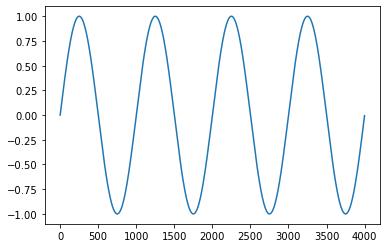

In [23]:
period = 2
T = 2000
y_base = [np.sin(2*np.pi*period*t/T) for t in range(2*T)]
plt.plot(y_base)

In [4]:
number_of_wins = np.zeros(11)
for i in range(1402,2830):
    filter2 = df["Method"] != 'bandits_recent'
    filter3 = df["Method"] != 'best_model'
    try:
        filter1 = df["Dataset"] == 'M3F'+str(i)
        df_new = df.where(filter1 & filter2 & filter3)
        ind = df_new[df_new["Dataset"] == 'M3F'+str(i)].MAPE.idxmin()
        number_of_wins[ind] += 1
    except:
        pass
print(number_of_wins)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
